In [1]:
'''
Is the movie industry dying? is Netflix the new entertainment king? 
Those were the first questions that lead me to create a dataset focused on movie revenue and analyze it over the last decades. 
But, why stop there? There are more factors that intervene in this kind of thing, like actors, genres, user ratings and more. 
And now, anyone with experience (you) can ask specific questions about the movie industry, and get answers.
'''
%reset

In [131]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='once')

In [136]:
data_raw = pd.read_csv('movies_fixed.csv')
data_raw.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [57]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


## Initial data understanding

### Budget

/Users/slechwar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


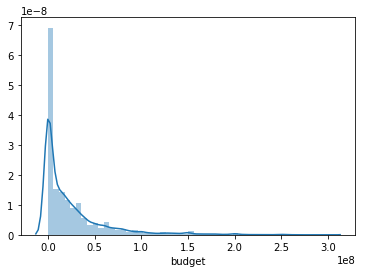

In [58]:
sns.distplot(data_raw['budget'])

In [59]:
data_raw['budget'].value_counts().head()
# We have more than 2000 zero budget movies. Is that correct? Let's check this out...

0.0           2182
20000000.0     207
30000000.0     191
25000000.0     177
15000000.0     170
Name: budget, dtype: int64

In [60]:
data_raw[data_raw['budget'] == 0.0].head()
# "The Name of the Rose" is for sure NOT zero budget movie, I need to treat that as unknown

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
25,0.0,TriStar Pictures,USA,John Badham,Comedy,40697761.0,Short Circuit,PG,1986-05-09,98,6.6,Ally Sheedy,47068,S.S. Wilson,1986
26,0.0,Neue Constantin Film,Italy,Jean-Jacques Annaud,Crime,7153487.0,The Name of the Rose,R,1986-09-24,130,7.8,Sean Connery,86991,Umberto Eco,1986
27,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986
32,0.0,Gaumont,France,Jean-Jacques Beineix,Drama,2003822.0,Betty Blue,Not specified,1986-11-07,120,7.4,Jean-Hugues Anglade,14562,Philippe Djian,1986
35,0.0,Columbia Pictures Corporation,USA,John G. Avildsen,Action,115103979.0,The Karate Kid Part II,PG,1986-06-20,113,5.9,Pat Morita,58370,Robert Mark Kamen,1986


In [64]:
# What was higher budget movies? Is that real?
data_raw.sort_values(by='budget', ascending=False).head()
# Seems real.
# Idea for data transformation -> create bucket'ize version of variable

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
4631,300000000.0,Walt Disney Pictures,USA,Gore Verbinski,Action,309420425.0,Pirates of the Caribbean: At World's End,PG-13,2007-05-25,169,7.1,Johnny Depp,514191,Ted Elliott,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007
6624,250000000.0,Marvel Studios,USA,Anthony Russo,Action,408084349.0,Captain America: Civil War,PG-13,2016-05-06,147,7.9,Chris Evans,442645,Christopher Markus,2016
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014


### Gross

In [105]:
data_raw[data_raw['gross'] == 0.0]
# no 0.0's

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year


### Comapny

In [67]:
data_raw['company'].value_counts().shape

(2179,)

In [69]:
data_raw['company'].value_counts().head()

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
Name: company, dtype: int64

### Country

In [71]:
data_raw['country'].value_counts().shape

(57,)

In [73]:
data_raw['country'].value_counts().head()

USA        4872
UK          698
France      283
Canada      150
Germany     134
Name: country, dtype: int64

In [95]:
top_5_countries = list(data_raw['country'].value_counts().head(5).index)
data_raw_top_5_countries = data_raw[data_raw['country'].isin(top_5_countries)]

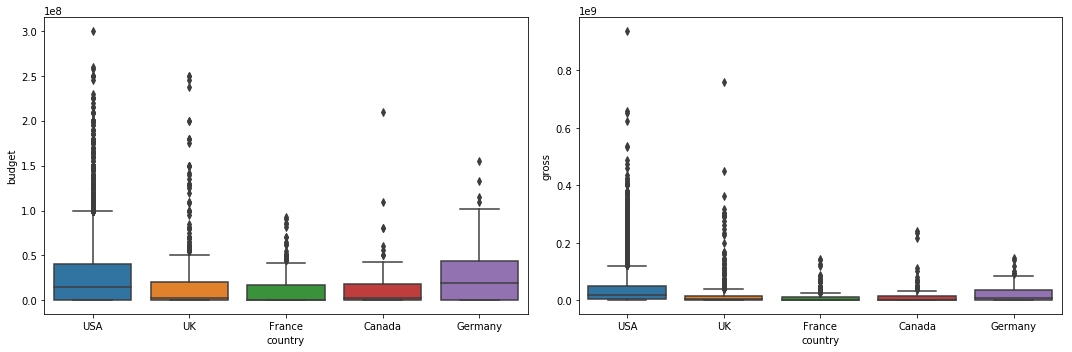

In [102]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(x='country', y='budget', data=data_raw_top_5_countries)

plt.subplot(122)
sns.boxplot(x='country', y='gross', data=data_raw_top_5_countries)

plt.tight_layout()

### Rating

In [103]:
data_raw['rating'].value_counts()
# Some explainantions:
# https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system
# Seems that we got a lot "R" restricted movies.

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
B                   1
B15                 1
TV-PG               1
TV-MA               1
TV-14               1
Name: rating, dtype: int64

### Data transformation

In [123]:
pd.qcut(x=data_raw['gross'], q=4, labels=['low', 'medium', 'high', 'extreme'], duplicates='drop')

0       extreme
1       extreme
2       extreme
3       extreme
4          high
5       extreme
6          high
7        medium
8       extreme
9       extreme
10      extreme
11       medium
12       medium
13       medium
14       medium
15       medium
16       medium
17         high
18       medium
19         high
20         high
21      extreme
22       medium
23      extreme
24      extreme
25      extreme
26       medium
27         high
28      extreme
29       medium
         ...   
6790       high
6791        low
6792        low
6793        low
6794     medium
6795        low
6796     medium
6797     medium
6798        low
6799    extreme
6800    extreme
6801     medium
6802        low
6803     medium
6804        low
6805        low
6806     medium
6807     medium
6808       high
6809        low
6810     medium
6811       high
6812        low
6813        low
6814       high
6815     medium
6816        low
6817     medium
6818        low
6819        low
Name: gross, Length: 682

In [127]:
def data_raw_transformation(data_raw):
    result = data_raw.copy()
    # Use regression to fill 0.0's in budget.
    # TBD
    
    # figure out same bin edges!!!
    
    # Ceate bucket'ize version of budget.
    result['budget_bin'] = pd.qcut(
        x=result['budget'], q=5, labels=['low', 'medium', 'high', 'extreme'], duplicates='drop')
    # Create bucket'ize version of gross.
    result['gross_bin'] = pd.qcut(
        x=result['gross'], q=4, labels=['low', 'medium', 'high', 'extreme'], duplicates='drop')    
    # Create bucket'ize version of votes.
    result['votes_bin'] = pd.qcut(
        x=result['votes'], q=4, labels=['few', 'some', 'many', 'a lot of'], duplicates='drop')        
    # Create bucket'ize version of runtime.
    # Create bucket'ize version of released (spring, summer, autumn, winter).
    
    
    return result

data = data_raw_transformation(data_raw)

In [128]:
data.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,budget_bin,gross_bin,votes_bin
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,medium,extreme,a lot of
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,medium,extreme,a lot of
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,medium,extreme,a lot of
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,high,extreme,a lot of
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,medium,high,many
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,medium,extreme,a lot of
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986,high,high,a lot of
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986,medium,medium,a lot of
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986,medium,extreme,many
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986,medium,extreme,a lot of


## Additonal stuff

### Regression model for filling budget

In [149]:
def get_column_types(df):
    qualitative = list(data_raw._get_numeric_data().columns)
    quantitative = [c for c in list(df.columns) if c not in qualitative]
    return qualitative, quantitative

qualitative, quantitative = get_column_types(data_raw)
print(quantitative)
print(qualitative)

['company', 'country', 'director', 'genre', 'name', 'rating', 'released', 'star', 'writer']
['budget', 'gross', 'runtime', 'score', 'votes', 'year']


In [145]:
# Prepare data
def ml_data_preparation(df):
    result = df.copy()
    result.
    
    
    return result


train = ml_data_preparation(data_raw)

In [ ]:
# Prepare datasets.
TARGET = 'budget'
y = train[TARGET]
X = train.drop(TARGET, axis=1)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=242)
